In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/nadaalay/Heart-Disease-Classifier-Web-App/master/data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [3]:
data['target'].replace(to_replace=1,value=0,inplace=True)
data['target'].replace(to_replace=2,value=1,inplace=True)

In [4]:
df=data.copy()

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [6]:
df.shape

(270, 14)

There are 14 features and 303 rows of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
cp,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
trestbps,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
chol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fbs,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
restecg,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
thalach,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exang,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


# Check for null values

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Comment:-**There are no null values in any of the 14 features in the dataset

In [10]:
df['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

# Percentage of patients with and without heart disease

In [11]:
df['target'].value_counts()/df.shape[0]*100

0    55.555556
1    44.444444
Name: target, dtype: float64

**Comment:-**
Out of total 45.54% of individual dont have heart disease whereas 54.45% have heart disease.So, the dataset is relatively balanced.

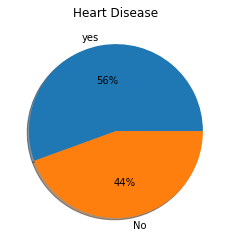

In [12]:
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%',shadow=True)
plt.title('Heart Disease')
plt.show()

**Note:-**
According to initial analysis,the dataset contain 14 columns out of which 5 are numerical value column ans 9 are categorical value column.There are no missing values in this dataset and for Data balancing,the data is relatively balanced as 56% of the individuals in the dataset have heart disease

# Attributes Correlation

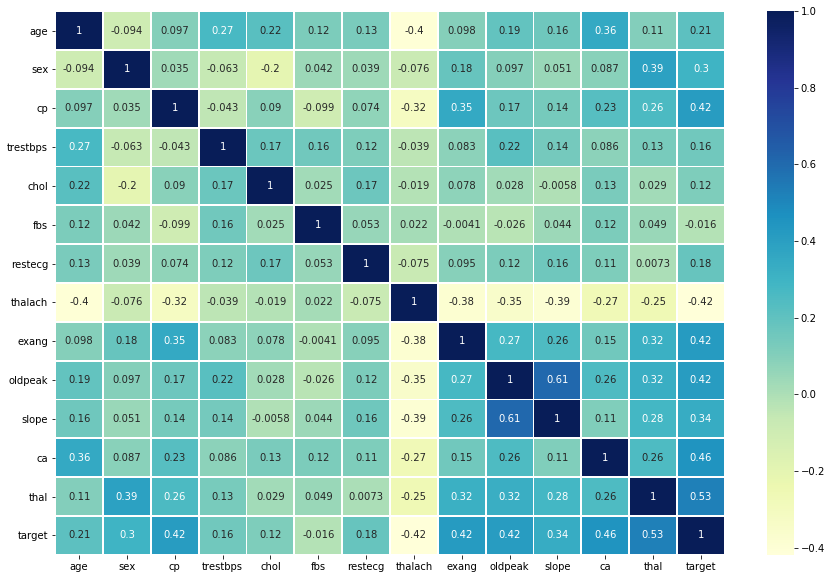

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.8,cmap="YlGnBu")
plt.show()

## Age Exploration

In [14]:
#Getting minimum and maximum age value
print("The minimum age :-",min(df['age']))
print("The maximum age :-",max(df['age']))
print("Averge age :- %.3f "%(df['age'].mean() ))


The minimum age :- 29
The maximum age :- 77
Averge age :- 54.433 


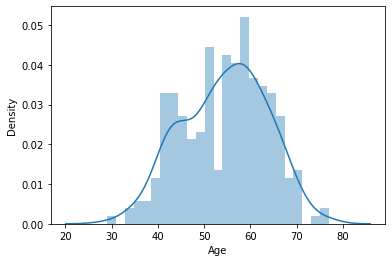

In [15]:
#Age distribution 
sns.distplot(df['age'],bins=25,axlabel="Age")
plt.show()

**Comment:-**
Age feature is normally distributes which is good

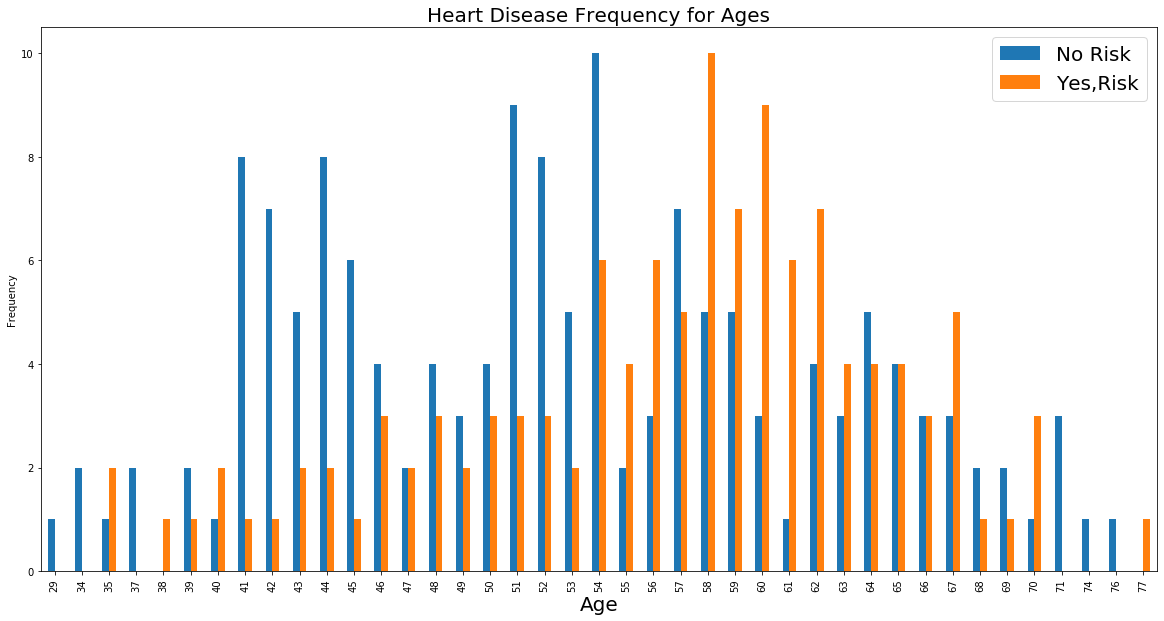

In [16]:
pd.crosstab(df['age'],df['target']).plot(kind='bar',figsize=(20,10))
plt.title('Heart Disease Frequency for Ages',fontsize=20)
plt.legend(["No Risk","Yes,Risk"],fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Frequency')
plt.show()

**Comment:-**From above graph we can say that the risk of heart disease is more in individuals of Age above 45 years

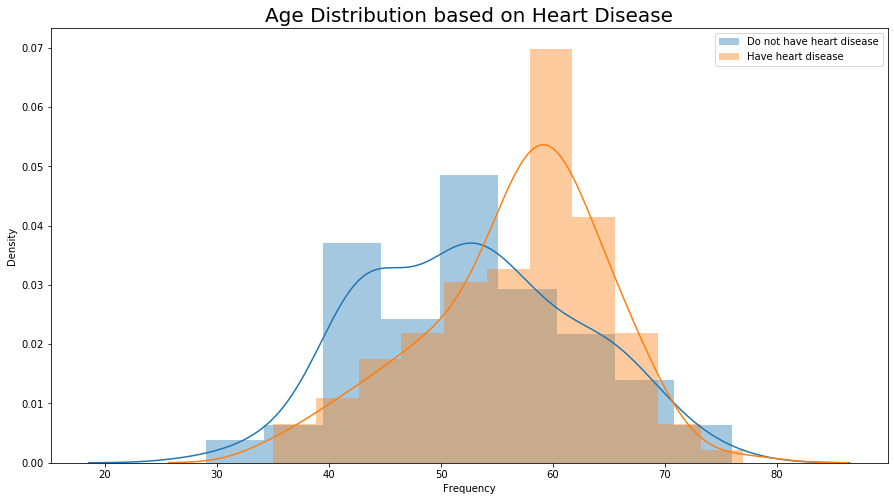

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(df[df['target']==0]['age'],label='Do not have heart disease')
sns.distplot(df[df['target']==1]['age'],label="Have heart disease")
plt.xlabel('Frequency')
#plt.ylabel('Age',fontsize=15)
plt.title('Age Distribution based on Heart Disease',fontsize=20)
plt.legend()
plt.show()

**Comment:-**
Individual having heart disease are maximum in age group 55-65 years old

In [18]:
# Get min, max and average age of people do not have heart disease
print('Min Age of people who do not have heart disease: ', min(df[df['target'] == 0]['age']))
print('Max Age of people who do not have heart disease: ', max(df[df['target'] == 0]['age']))
print('Average Age of people who do not have heart disease: %.2f '%(df[df['target'] == 0]['age'].mean()))

Min Age of people who do not have heart disease:  29
Max Age of people who do not have heart disease:  76
Average Age of people who do not have heart disease: 52.71 


In [19]:
# Get min, max and average age of people who  have heart disease
print('Min Age of people who have heart disease: ', min(df[df['target'] == 1]['age']))
print('Max Age of people who have heart disease: ', max(df[df['target'] == 1]['age']))
print('Average Age of people who have heart disease: %.2f'%(df[df['target'] == 1]['age'].mean()))

Min Age of people who have heart disease:  35
Max Age of people who have heart disease:  77
Average Age of people who have heart disease: 56.59


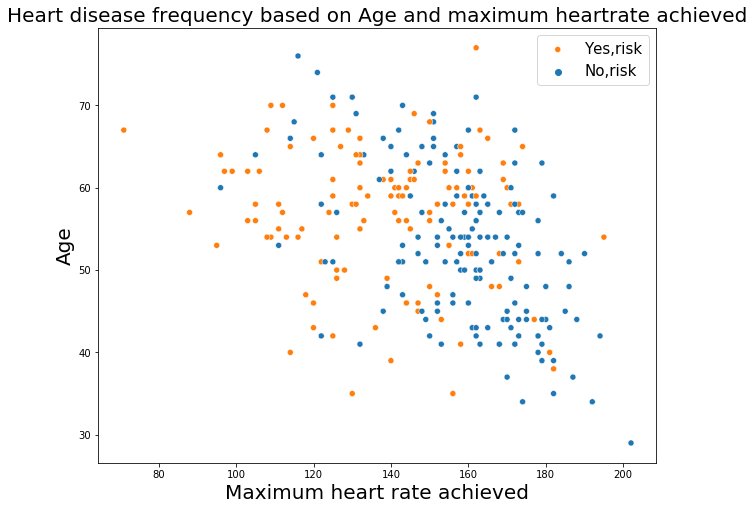

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(y='age',x='thalach',data=df,hue='target')
plt.xlabel("Maximum heart rate achieved",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Heart disease frequency based on Age and maximum heartrate achieved",fontsize=20)
plt.legend(['Yes,risk',"No,risk"],fontsize=15)
plt.show()

**Note:-**From above graph we could say that older people cannot achieve maximum heart rate as they are suffering from heart related issue

**Note:-**
From above analysis we can say that old individuals are move prone to heart related disease as compare to young people but there are some cases in which young individual also have heart related complications.

# Gender Exploration

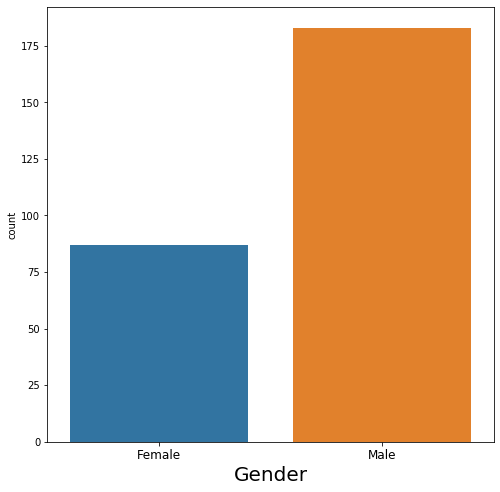

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['sex'])
plt.xticks(np.arange(2),('Female',"Male"),fontsize=12)
plt.xlabel("Gender",fontsize=20)
plt.show()

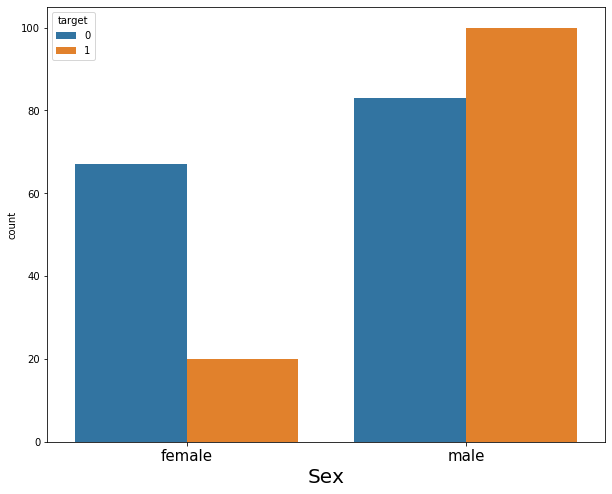

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['sex'],hue=df['target'])
plt.xlabel("Sex",fontsize=20)
plt.xticks(np.arange(2),("female","male"),fontsize=15)
plt.show()

<Figure size 720x576 with 0 Axes>

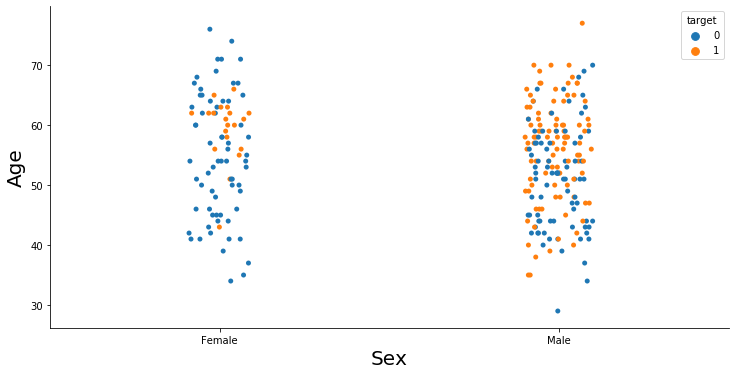

In [23]:
plt.figure(figsize=(10,8))
sns.catplot(x="sex", y="age", hue="target", data=df,legend_out=False,aspect=2)
plt.xticks(np.arange(2),("Female","Male"))
plt.xlabel("Sex",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

# Chest pain Exploration

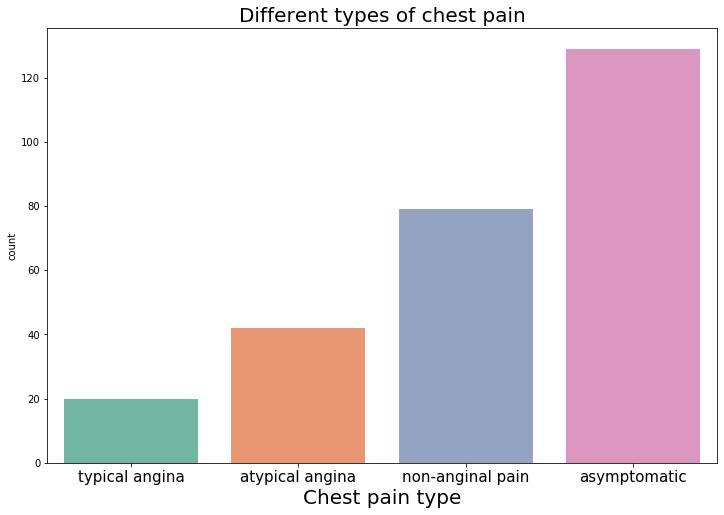

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(df['cp'],palette="Set2")
plt.title("Different types of chest pain",fontsize=20)
plt.xticks(np.arange(4),('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'),rotation=0,fontsize=15)
plt.xlabel("Chest pain type",fontsize=20)
plt.show()

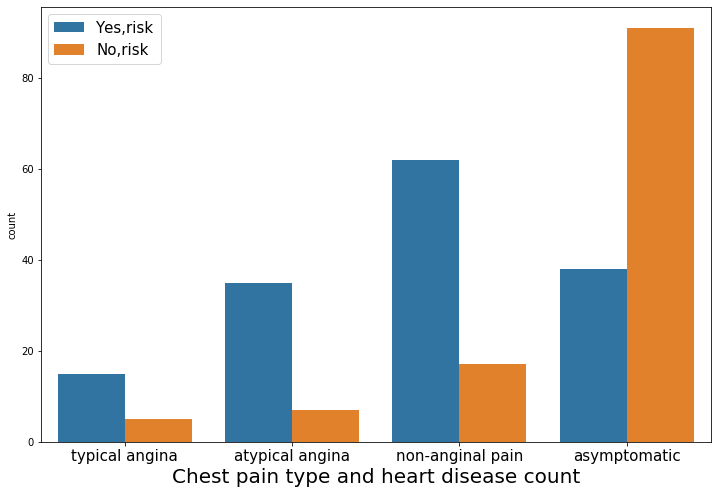

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['cp'],hue=df['target'])
plt.legend(['Yes,risk',"No,risk"],fontsize=15)
plt.xticks(np.arange(4),('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'),rotation=0,fontsize=15)
plt.xlabel("Chest pain type and heart disease count",fontsize=20)
plt.show()

<Figure size 864x576 with 0 Axes>

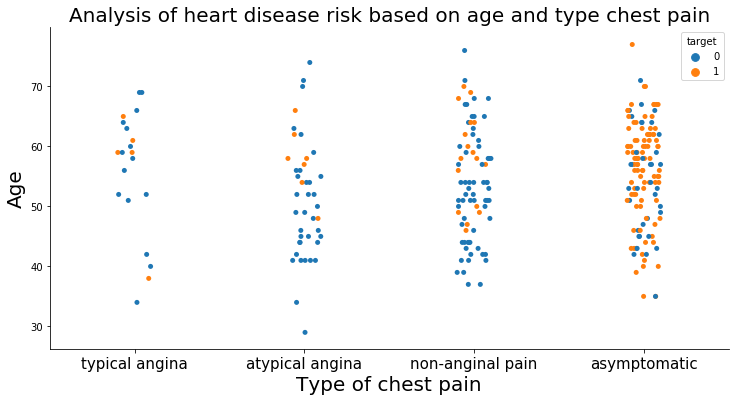

In [26]:
plt.figure(figsize=(12,8))
sns.catplot(x="cp", y="age", hue="target", data=df,legend_out=False,aspect=2)
plt.xticks(np.arange(4),('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'),fontsize=15)
plt.xlabel("Type of chest pain",fontsize=20)
plt.title("Analysis of heart disease risk based on age and type chest pain",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

# Blood Pressure Exploration

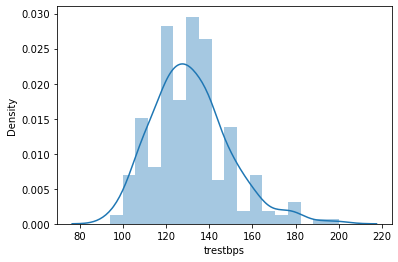

In [27]:
sns.distplot(df['trestbps'])

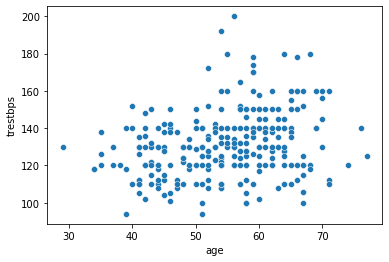

In [28]:
sns.scatterplot(y='trestbps',x='age',data=df)

In [29]:
# Get min, max and average blood pressure of individual do not have heart disease
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: %.2f '%(df[df['target'] == 0]['trestbps'].mean()))

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease: 128.87 


In [30]:
# Get min, max and average blood pressure of individual do not have heart disease
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who do not have heart disease: %.2f '%(df[df['target'] == 1]['trestbps'].mean()))

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease: 134.44 


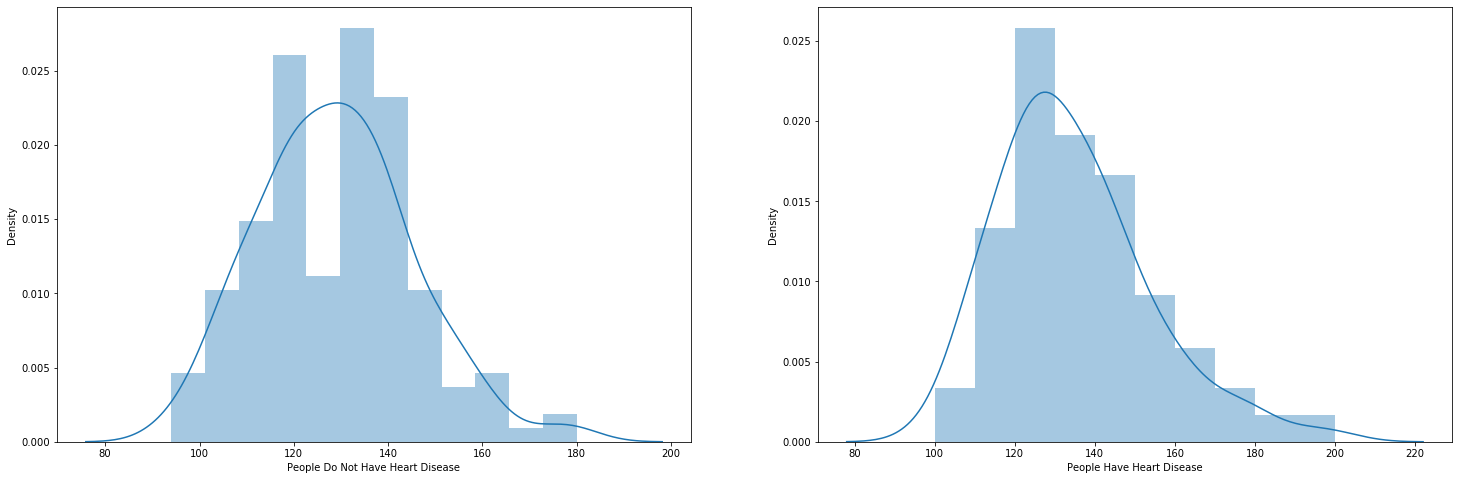

In [31]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 8))
ax = sns.distplot(df[df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

# Fasting Blood Sugar Exploration

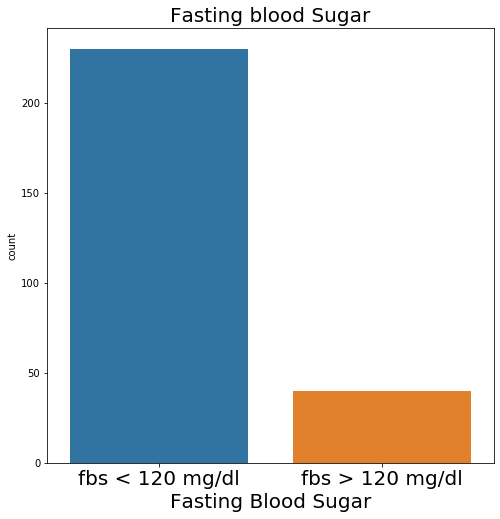

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(df['fbs'])
plt.xticks(np.arange(2),('fbs < 120 mg/dl', 'fbs > 120 mg/dl'),fontsize=20)
plt.xlabel("Fasting Blood Sugar",fontsize=20)
plt.title("Fasting blood Sugar",fontsize=20)
plt.show()

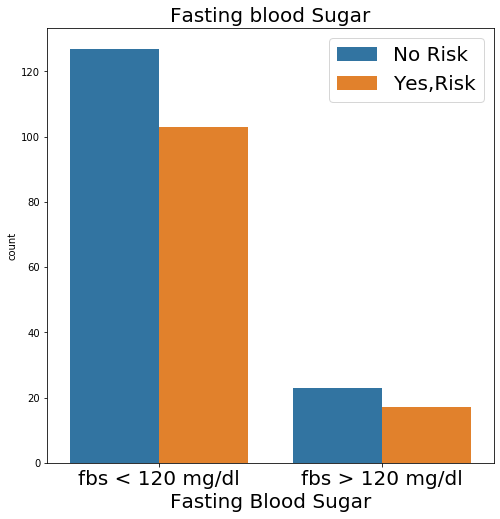

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(df['fbs'],hue=df['target'])
plt.xticks(np.arange(2),('fbs < 120 mg/dl', 'fbs > 120 mg/dl'),fontsize=20)
plt.xlabel("Fasting Blood Sugar",fontsize=20)
plt.legend(["No Risk","Yes,Risk"],fontsize=20)
plt.title("Fasting blood Sugar",fontsize=20)
plt.show()

# Electrocardiographic Results Exploration

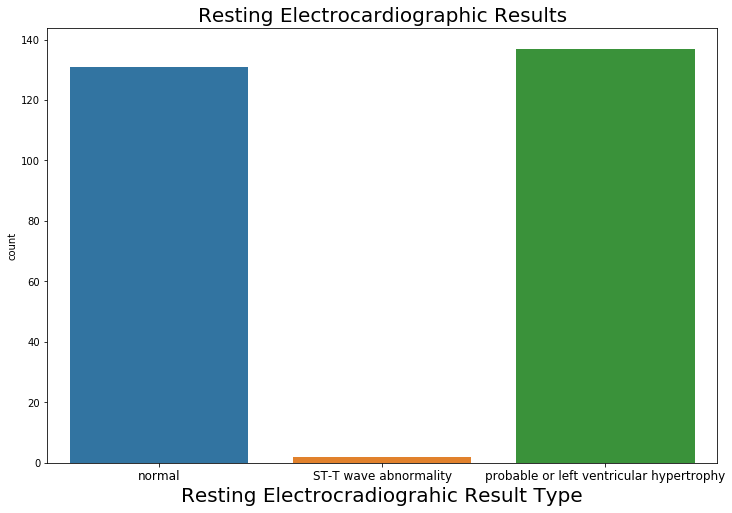

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(df['restecg'])
plt.title("Resting Electrocardiographic Results",fontsize=20)
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'),fontsize=12)
plt.xlabel("Resting Electrocradiograhic Result Type",fontsize=20)
plt.show()

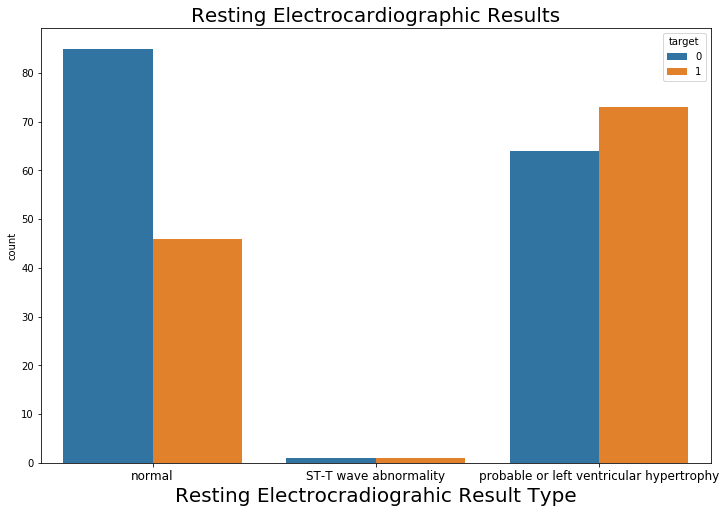

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(df['restecg'],hue=df['target'])
plt.title("Resting Electrocardiographic Results",fontsize=20)
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'),fontsize=12)
plt.xlabel("Resting Electrocradiograhic Result Type",fontsize=20)
plt.show()

# Maximum Heart Rate Exploration

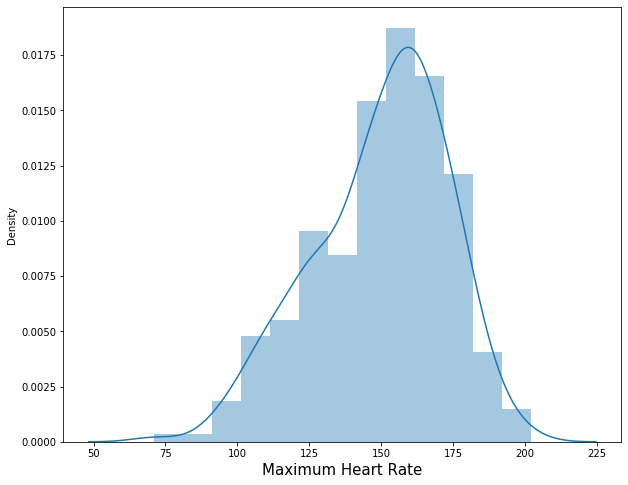

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(df['thalach'])
plt.xlabel("Maximum Heart Rate",fontsize=15)
plt.show()

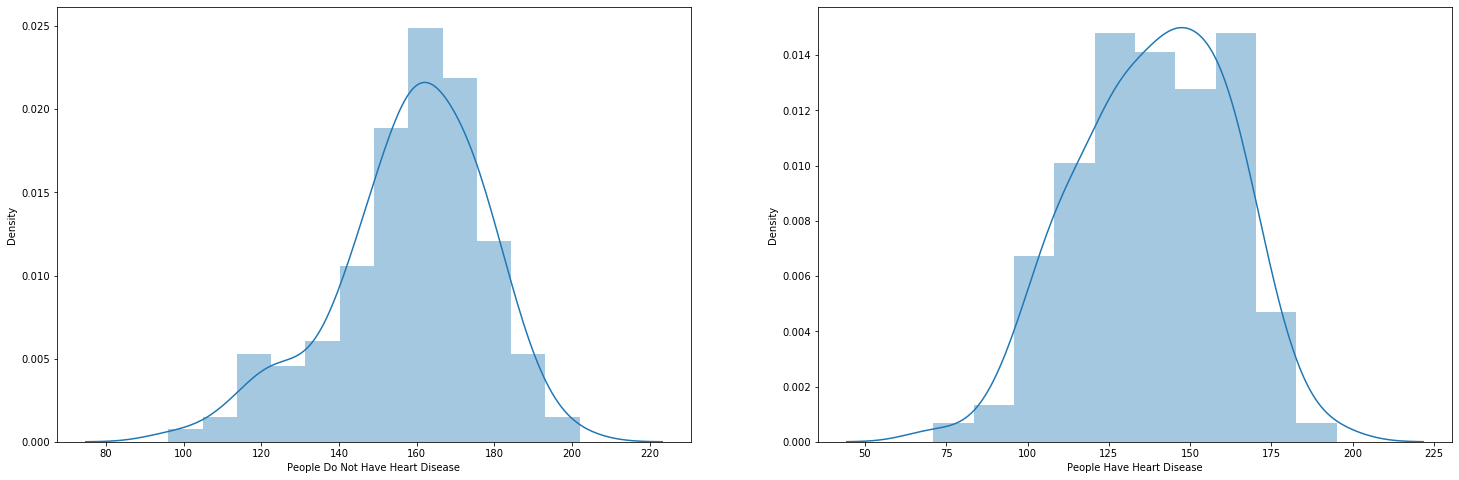

In [37]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 8))
ax = sns.distplot(df[df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

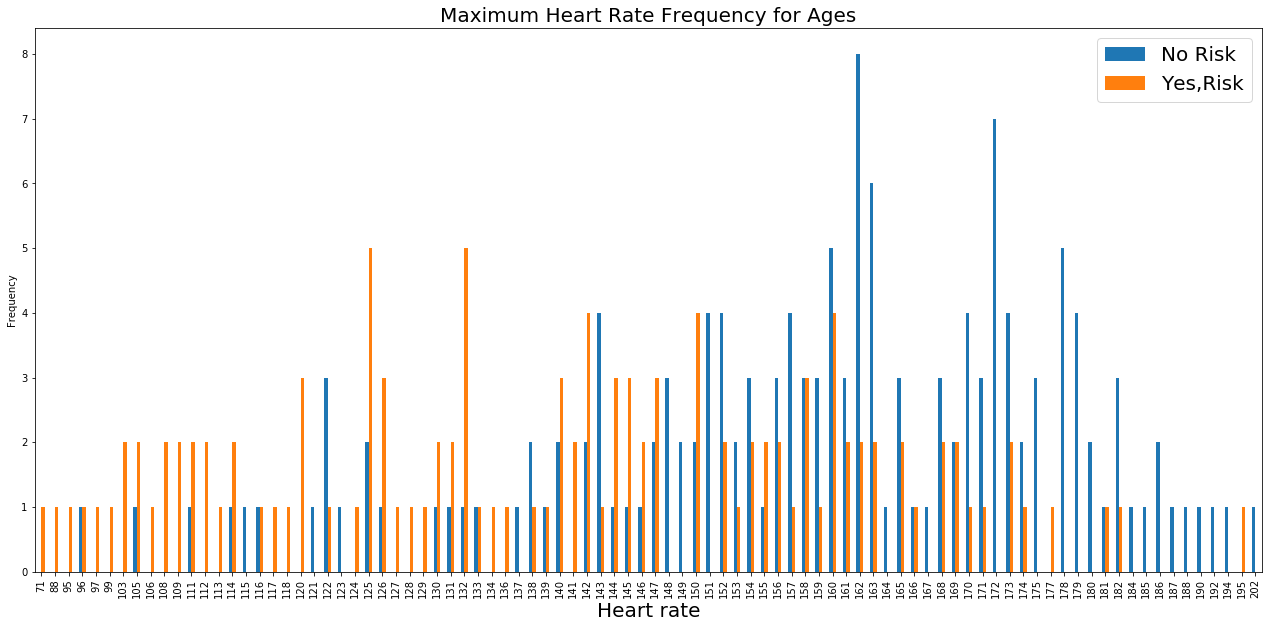

In [38]:
pd.crosstab(df['thalach'],df['target']).plot(kind='bar',figsize=(22,10))
plt.title('Maximum Heart Rate Frequency for Ages',fontsize=20)
plt.legend(["No Risk","Yes,Risk"],fontsize=20)
plt.xlabel('Heart rate',fontsize=20)
plt.ylabel('Frequency')
plt.show()

In [39]:
print('Min Heart rate achieved of people who do not have heart disease: ', min(df[df['target'] == 0]['thalach']))
print('Max Heart rate achieved of people who do not have heart disease: ', max(df[df['target'] == 0]['thalach']))
print('Average Heart rate achieved of people who do not have heart disease: ', df[df['target'] == 0]['thalach'].mean())

Min Heart rate achieved of people who do not have heart disease:  96
Max Heart rate achieved of people who do not have heart disease:  202
Average Heart rate achieved of people who do not have heart disease:  158.33333333333334


In [40]:
print('Min Heart rate achieved of people who do  have heart disease: ', min(df[df['target'] == 1]['thalach']))
print('Max Heart rate achieved of people who do  have heart disease: ', max(df[df['target'] == 1]['thalach']))
print('Average Heart rate achieved of people who do  have heart disease: ', df[df['target'] == 1]['thalach'].mean())

Min Heart rate achieved of people who do  have heart disease:  71
Max Heart rate achieved of people who do  have heart disease:  195
Average Heart rate achieved of people who do  have heart disease:  138.85833333333332


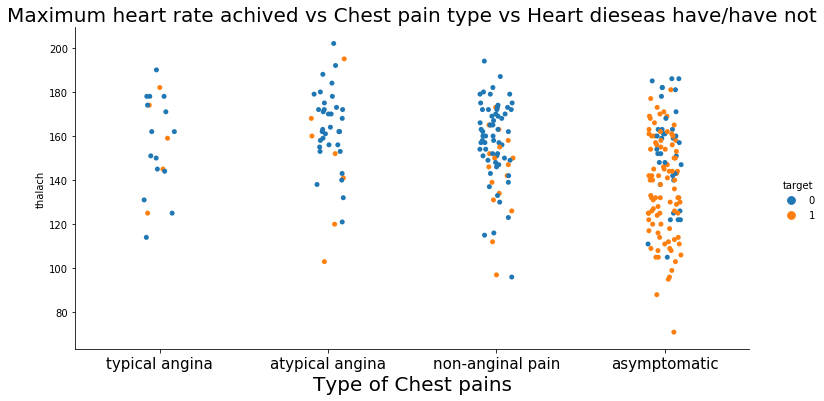

In [41]:
sns.catplot(y='thalach',x='cp',hue='target',data=df,aspect=2)
plt.title("Maximum heart rate achived vs Chest pain type vs Heart dieseas have/have not",fontsize=20)
plt.xticks(np.arange(4),('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'),fontsize=15)
plt.xlabel("Type of Chest pains",fontsize=20)
plt.show()

# Exercise Induced Angina Exploration

Text(0.5, 1.0, 'Exercise Induced Angina Type count')

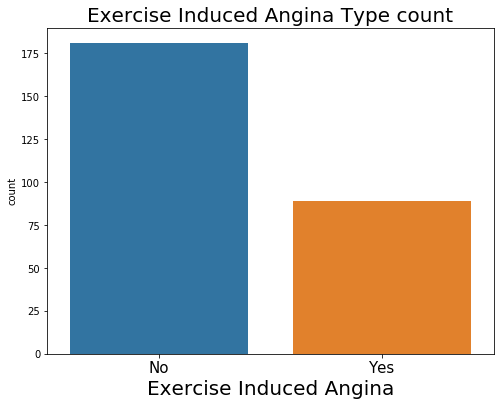

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(df['exang'])
plt.xlabel("Exercise Induced Angina",fontsize=20)
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0,fontsize=15)
plt.title("Exercise Induced Angina Type count",fontsize=20)

Text(0.5, 1.0, 'Exercise Induced Angina Type count')

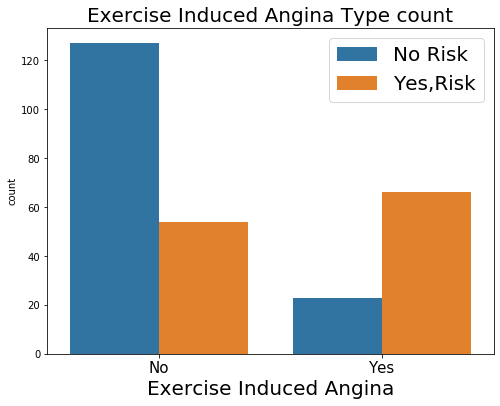

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(df['exang'],hue=df['target'])
plt.xlabel("Exercise Induced Angina",fontsize=20)
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0,fontsize=15)
plt.legend(["No Risk","Yes,Risk"],fontsize=20)
plt.title("Exercise Induced Angina Type count",fontsize=20)

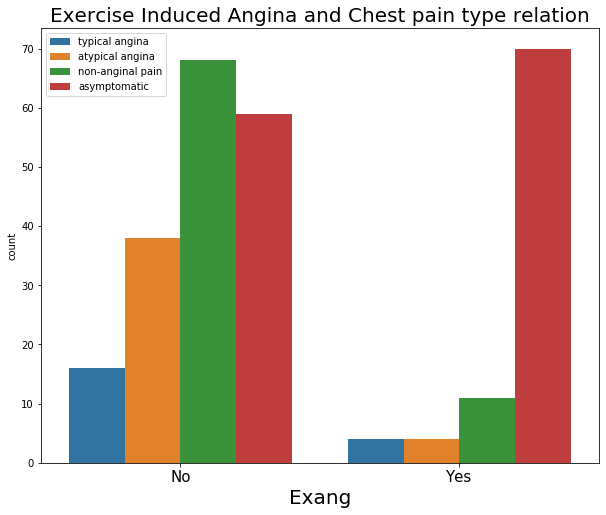

In [108]:
plt.figure(figsize=(10,8))
sns.countplot(df['exang'],hue=df['cp'])
plt.title("Exercise Induced Angina and Chest pain type relation",fontsize=20)
plt.legend(('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0,fontsize=15)
plt.xlabel("Exang",fontsize=20)
plt.show()

# ST depression Exploration

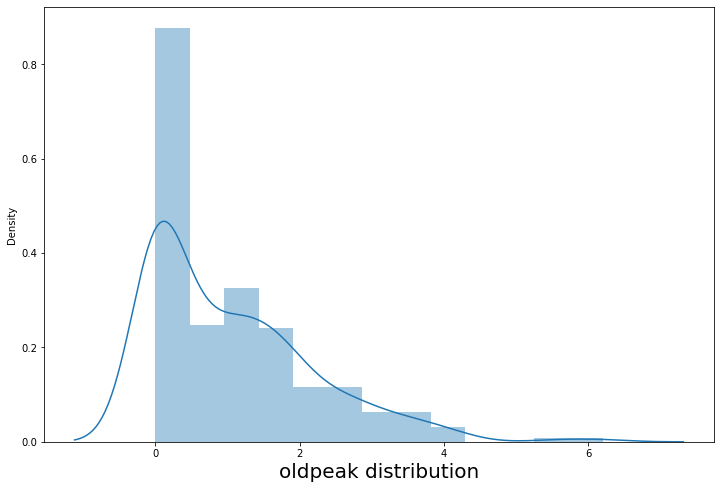

In [45]:
plt.figure(figsize=(12,8))
sns.distplot(df['oldpeak'])
plt.xlabel("oldpeak distribution",fontsize=20)
plt.show()

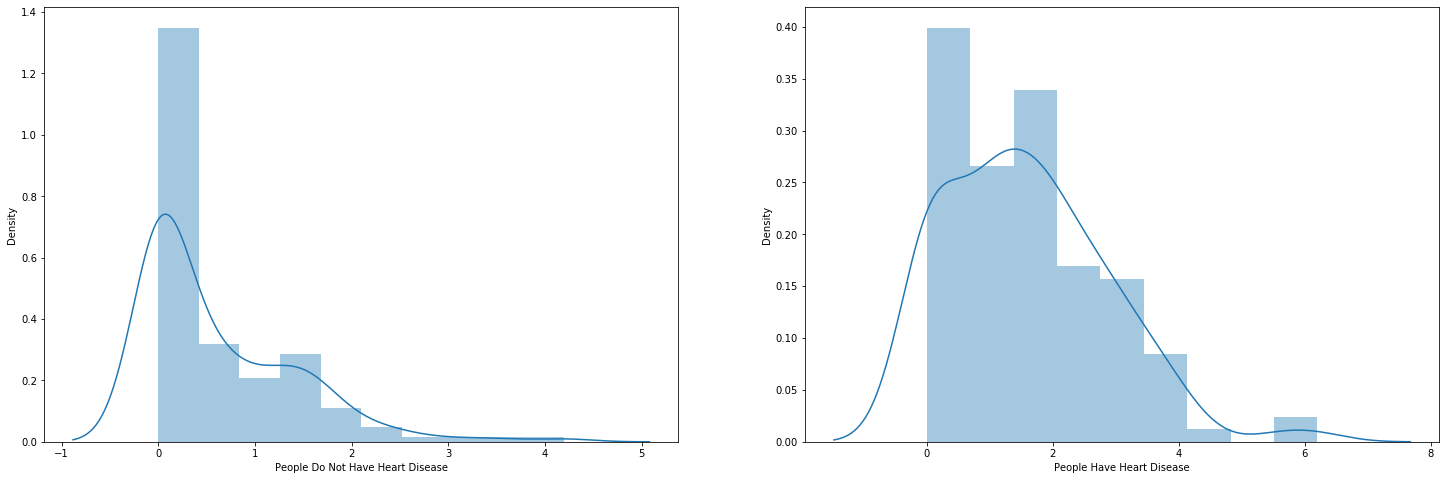

In [46]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 8))
ax = sns.distplot(df[df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [47]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(df[df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(df[df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', df[df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.2
Average ST depression of people who do not have heart disease:  0.6226666666666667


In [48]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(df[df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(df[df['target'] == 1]['oldpeak']))
print('Average ST depression of people have heart disease: ', df[df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  6.2
Average ST depression of people have heart disease:  1.5841666666666667


# Slope Exploration

In [49]:
df['slope'].value_counts()

1    130
2    122
3     18
Name: slope, dtype: int64

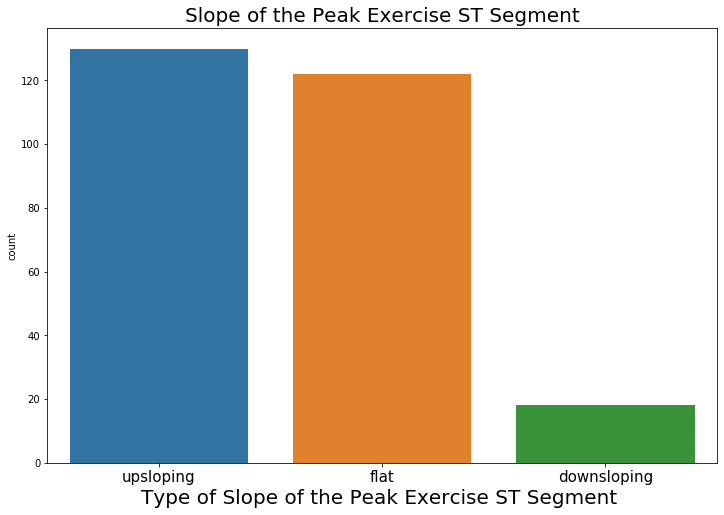

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(df['slope'])
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0,fontsize=15)
plt.title("Slope of the Peak Exercise ST Segment",fontsize=20)
plt.xlabel("Type of Slope of the Peak Exercise ST Segment ",fontsize=20)
plt.show()

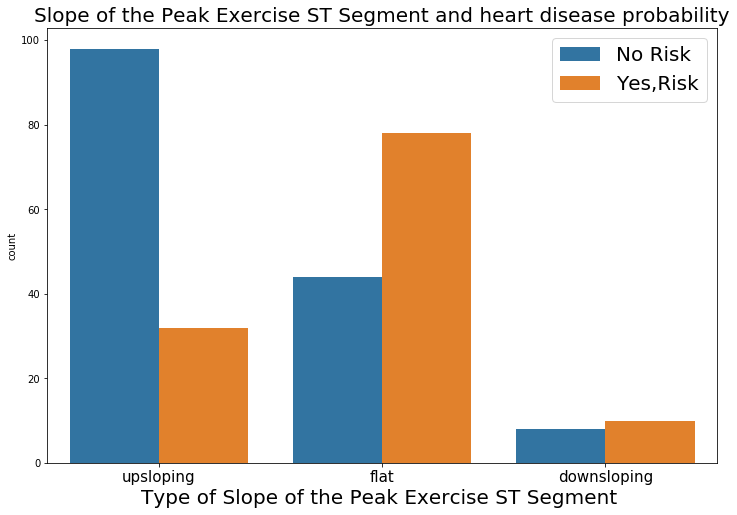

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(df['slope'],hue=df['target'])
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0,fontsize=15)
plt.title("Slope of the Peak Exercise ST Segment and heart disease probability",fontsize=20)
plt.xlabel("Type of Slope of the Peak Exercise ST Segment ",fontsize=20)
plt.legend(["No Risk","Yes,Risk"],fontsize=20)
plt.show()

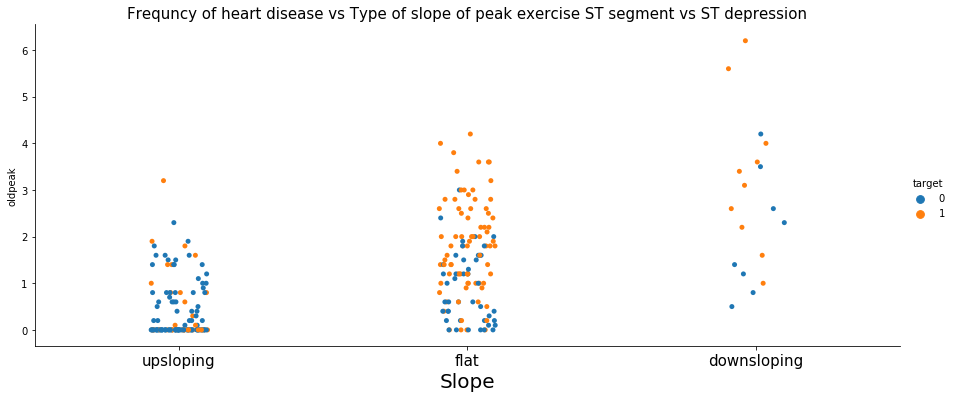

In [52]:
sns.catplot(x='slope',y='oldpeak',hue='target',data=df,aspect=2.5,height=5)
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0,fontsize=15)
plt.xlabel("Slope",fontsize=20)
plt.title("Frequncy of heart disease vs Type of slope of peak exercise ST segment vs ST depression",fontsize=15)
plt.show()

Note:

As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.


# Major Vessels Exploration

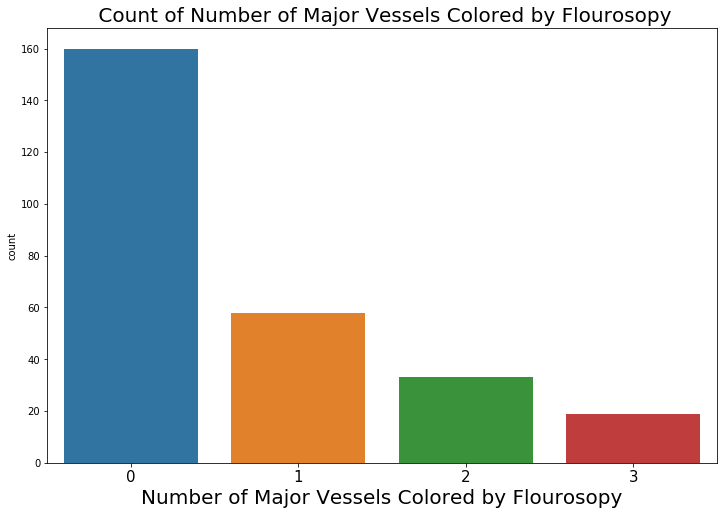

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(df['ca'])
plt.title(' Count of Number of Major Vessels Colored by Flourosopy',fontsize=20)
plt.xticks(np.arange(4),("0","1","2","3"),fontsize=15)
plt.xlabel("Number of Major Vessels Colored by Flourosopy",fontsize=20)
plt.show()

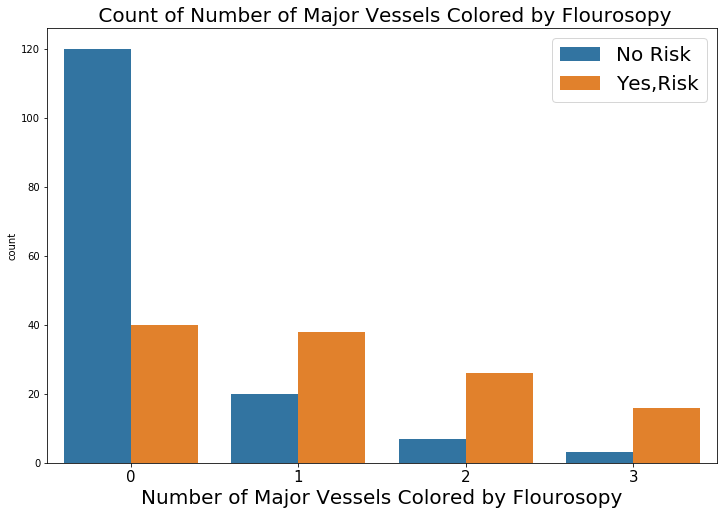

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(df['ca'],hue=df['target'])
plt.title(' Count of Number of Major Vessels Colored by Flourosopy',fontsize=20)
plt.xticks(np.arange(4),("0","1","2","3"),fontsize=15)
plt.legend(["No Risk","Yes,Risk"],fontsize=20)
plt.xlabel("Number of Major Vessels Colored by Flourosopy",fontsize=20)
plt.show()

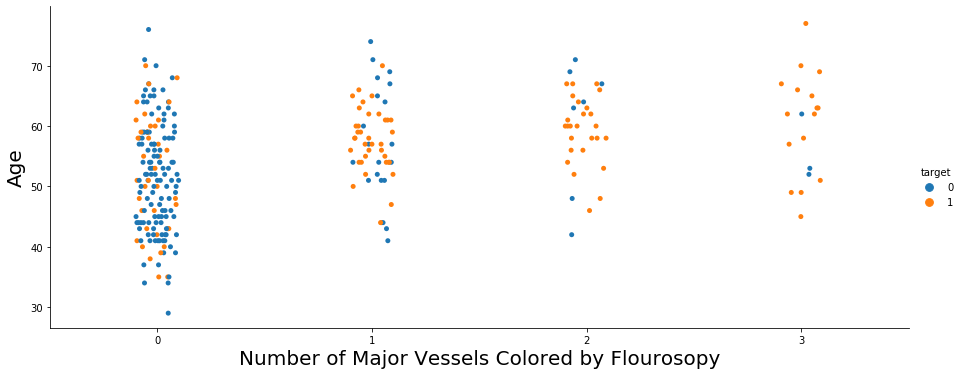

In [55]:
sns.catplot(x='ca',y='age',hue='target',data=df,aspect=2.5,height=5)
plt.xlabel("Number of Major Vessels Colored by Flourosopy",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()



Note:

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.


# Thalassemia Exploration

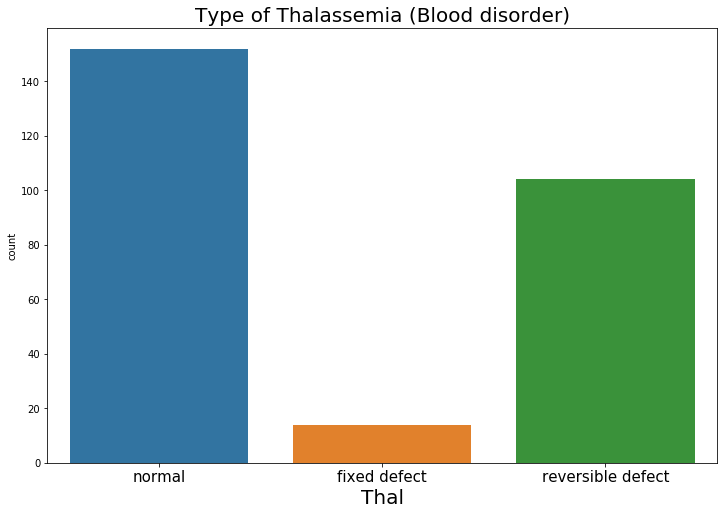

In [68]:
plt.figure(figsize=(12,8))
sns.countplot(df['thal'])
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0,fontsize=15)
plt.title("Type of Thalassemia (Blood disorder)",fontsize=20)
plt.xlabel("Thal",fontsize=20)
plt.show()

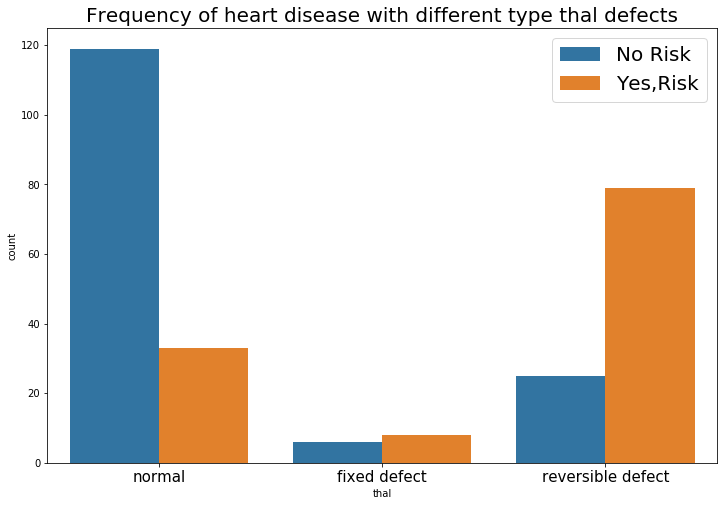

In [70]:
plt.figure(figsize=(12,8))
plt.title("Frequency of heart disease with different type thal defects",fontsize=20)
sns.countplot(df['thal'],hue=df['target'])
plt.legend(["No Risk","Yes,Risk"],fontsize=20)
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0,fontsize=15)
plt.show()

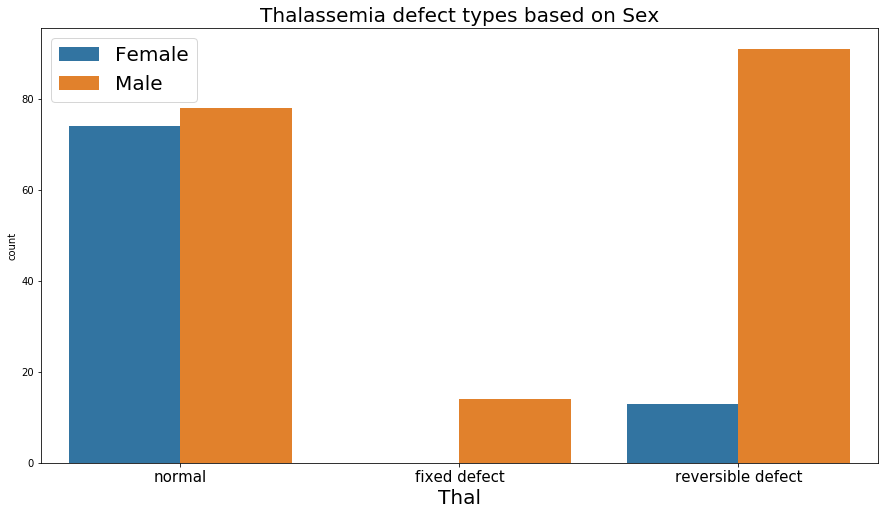

In [76]:
plt.figure(figsize=(15,8))
sns.countplot(df['thal'],hue=df['sex'])
plt.title("Thalassemia defect types based on Sex",fontsize=20)
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0,fontsize=15)
plt.xlabel("Thal",fontsize=20)
plt.legend(['Female',"Male"],fontsize=20)
plt.show()

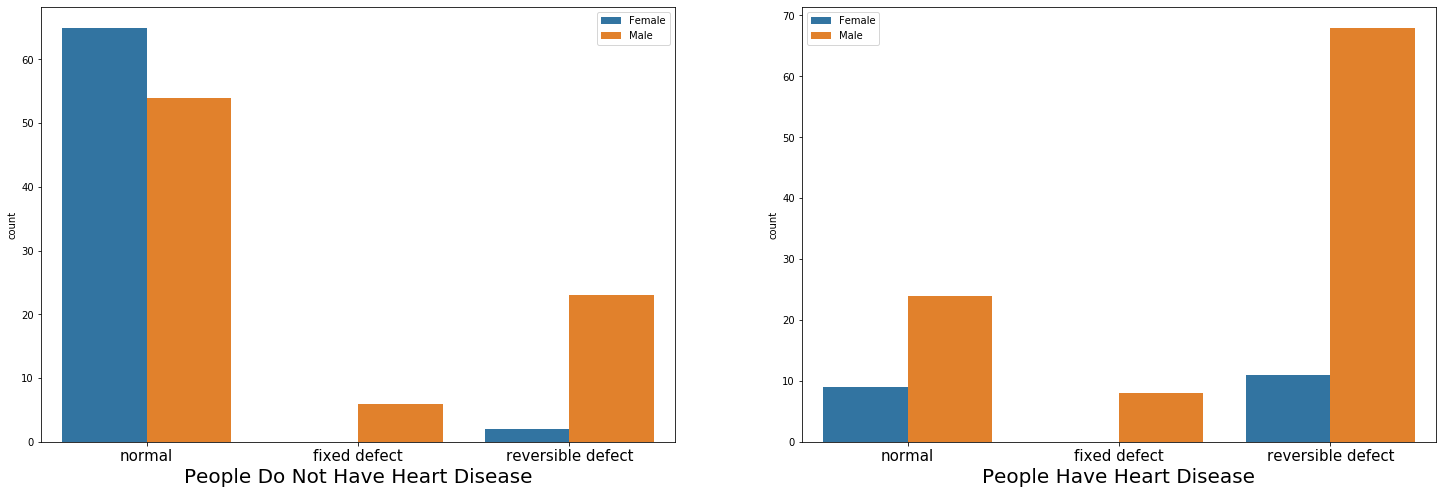

In [105]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 8))

ax = sns.countplot(df[df['target'] == 0]['thal'],hue=df['sex'] , ax = axis1)
ax.set_xlabel('People Do Not Have Heart Disease',fontsize=20)
ax.set_xticklabels(['normal', 'fixed defect', 'reversible defect'], fontsize=15)
ax.legend(["Female","Male"])

ax = sns.countplot(df[df['target'] == 1]['thal'],hue=df['sex'], ax = axis2)
ax.set_xlabel('People Have Heart Disease',fontsize=20)
ax.set_xticklabels(['normal', 'fixed defect', 'reversible defect'], fontsize=15)
ax.legend(["Female","Male"])

plt.show()

**Correlation between chest pain type (cp), exercise induced angina(exang) and Target variable**

Positive corelation was observed between the chest pain type (cp), exercise induced angina (exang)

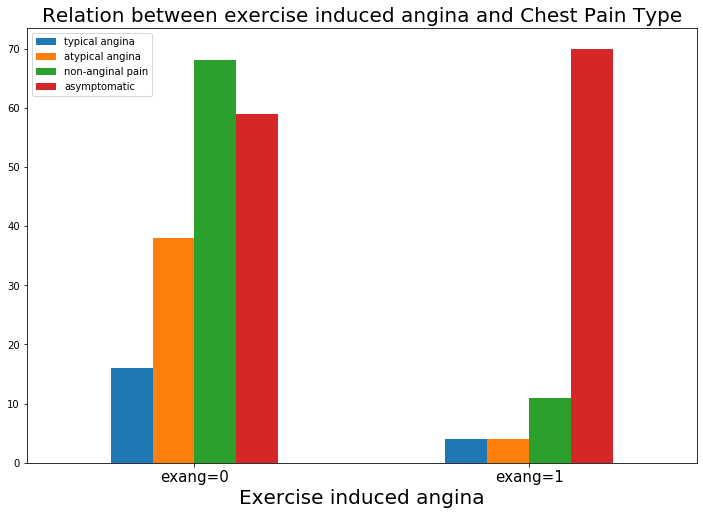

In [153]:
pd.crosstab(df['exang'],df['cp']).plot(kind='bar',figsize=(12,8))
plt.legend(['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.title("Relation between exercise induced angina and Chest Pain Type",fontsize=20)
plt.xlabel("Exercise induced angina",fontsize=20)
plt.xticks(np.arange(2),['exang=0',"exang=1"],rotation=0,fontsize=15)
plt.show()

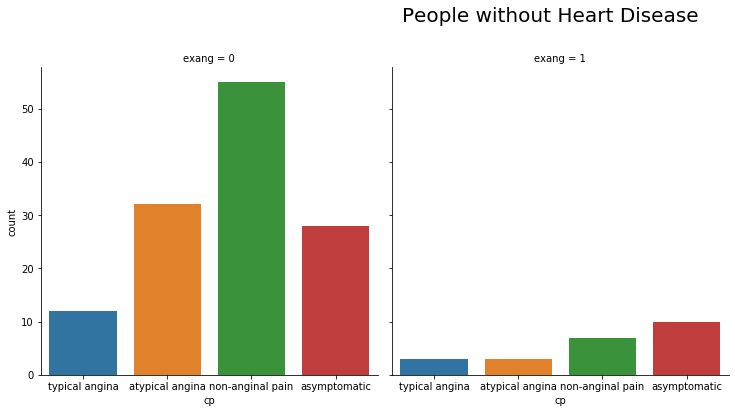

In [143]:
sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 0], kind = "count").fig.suptitle('People without Heart Disease', y = 1.1,fontsize=20)
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)


plt.show()

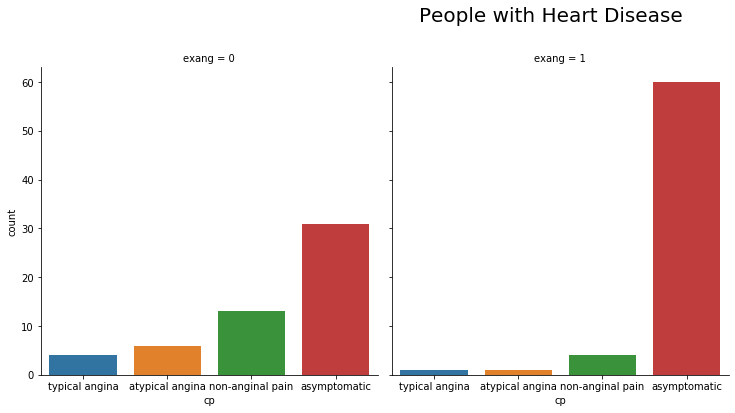

In [144]:
sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 1], kind = "count").fig.suptitle('People with Heart Disease', y = 1.1,fontsize=20)
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)


plt.show()

**Correlation between number of major vessels (0-3) colored by flourosopy (ca) and the age**

Postive correlation between the number of major vessels (0-3) colored by flourosopy (ca) and the age.

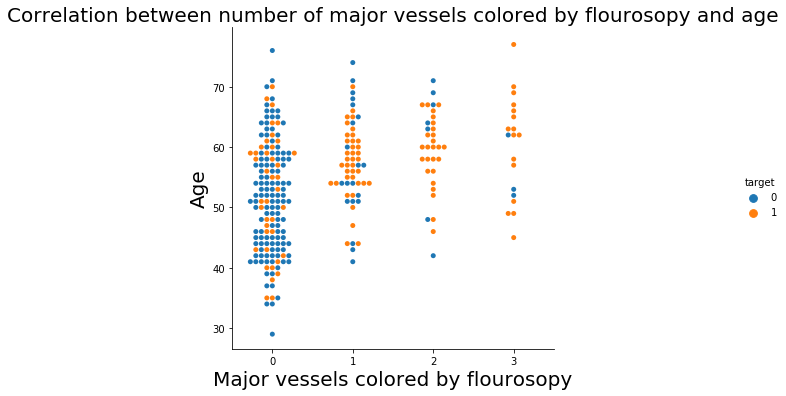

In [167]:
sns.catplot(x='ca',y='age',hue='target',data=df,kind="swarm")
plt.xlabel("Major vessels colored by flourosopy",fontsize=20)
plt.title("Correlation between number of major vessels colored by flourosopy and age",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

**Corelation between Thal(thalassemia) and Sex**

A positive correlation was seen between Thal(thalassemia) and Sex

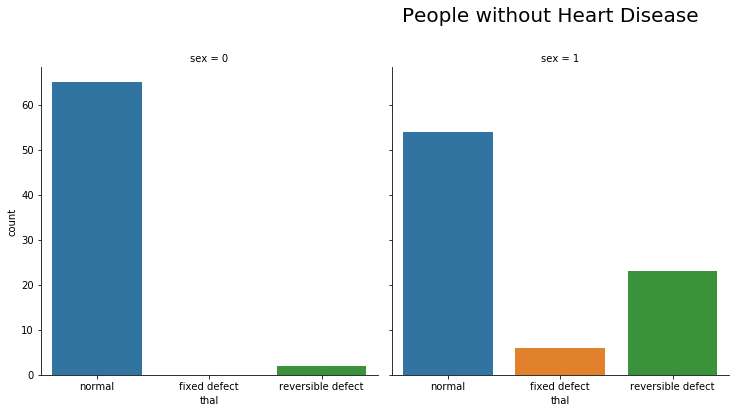

In [181]:
sns.factorplot("thal", col = "sex", col_wrap = 3, data = df[df['target'] == 0], kind = "count").fig.suptitle('People without Heart Disease', y = 1.1,fontsize=20)
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

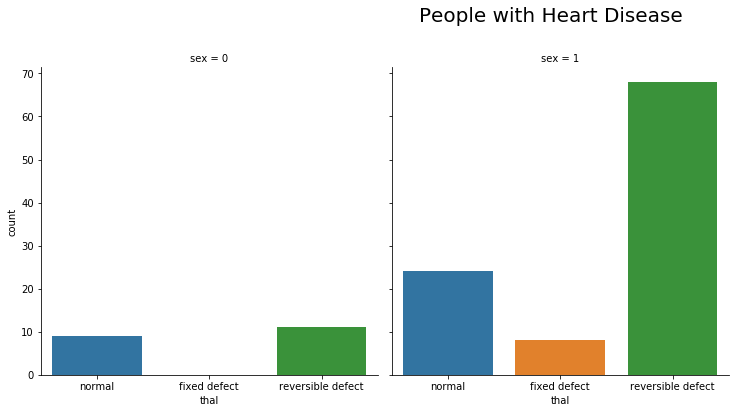

In [182]:
sns.factorplot("thal", col = "sex", col_wrap = 3, data = df[df['target'] == 1], kind = "count").fig.suptitle('People with Heart Disease', y = 1.1,fontsize=20)
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

**Correlation Between thalch (maximum heart rate achieved) and Age**

We see a Negative correaltion between Age and thalch(maximum heart rate achieved)

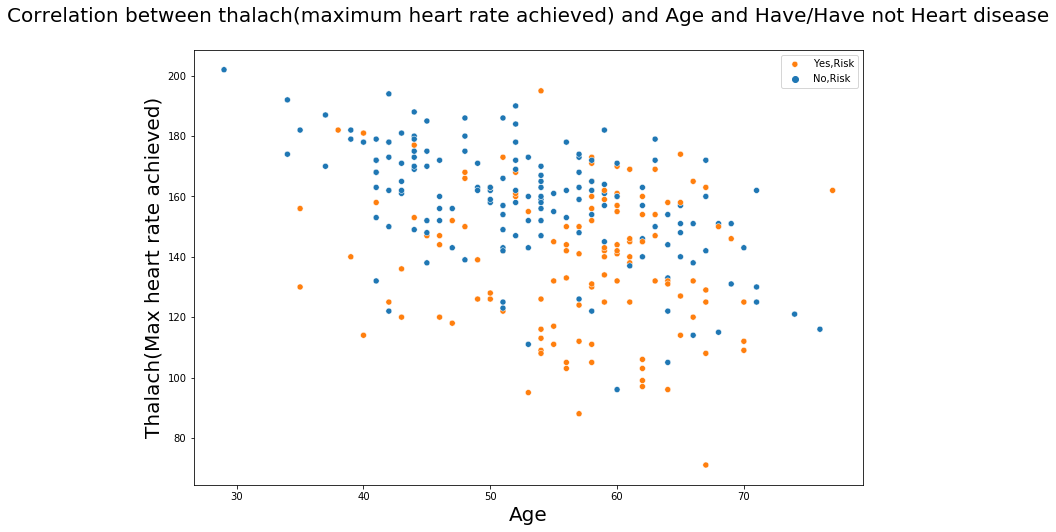

In [204]:
plt.figure(figsize=(12,8))
plt.title("Correlation between thalach(maximum heart rate achieved) and Age and Have/Have not Heart disease\n",fontsize=20)
sns.scatterplot(x='age',y='thalach',hue='target',data=df)
plt.xlabel("Age",fontsize=20)
plt.legend(["Yes,Risk",'No,Risk'])
plt.ylabel("Thalach(Max heart rate achieved)",fontsize=20)
plt.show()

**The correlation between oldpeak, slope and target**

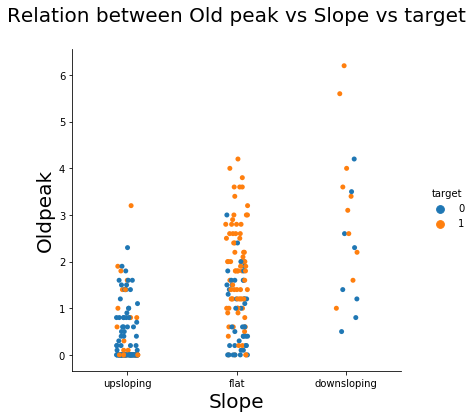

In [212]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = df)
plt.title("Relation between Old peak vs Slope vs target\n",fontsize=20)
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.xlabel("Slope",fontsize=20)
plt.ylabel("Oldpeak",fontsize=20)
plt.show()